<Figure size 2880x1440 with 0 Axes>

/Users/Sirius/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


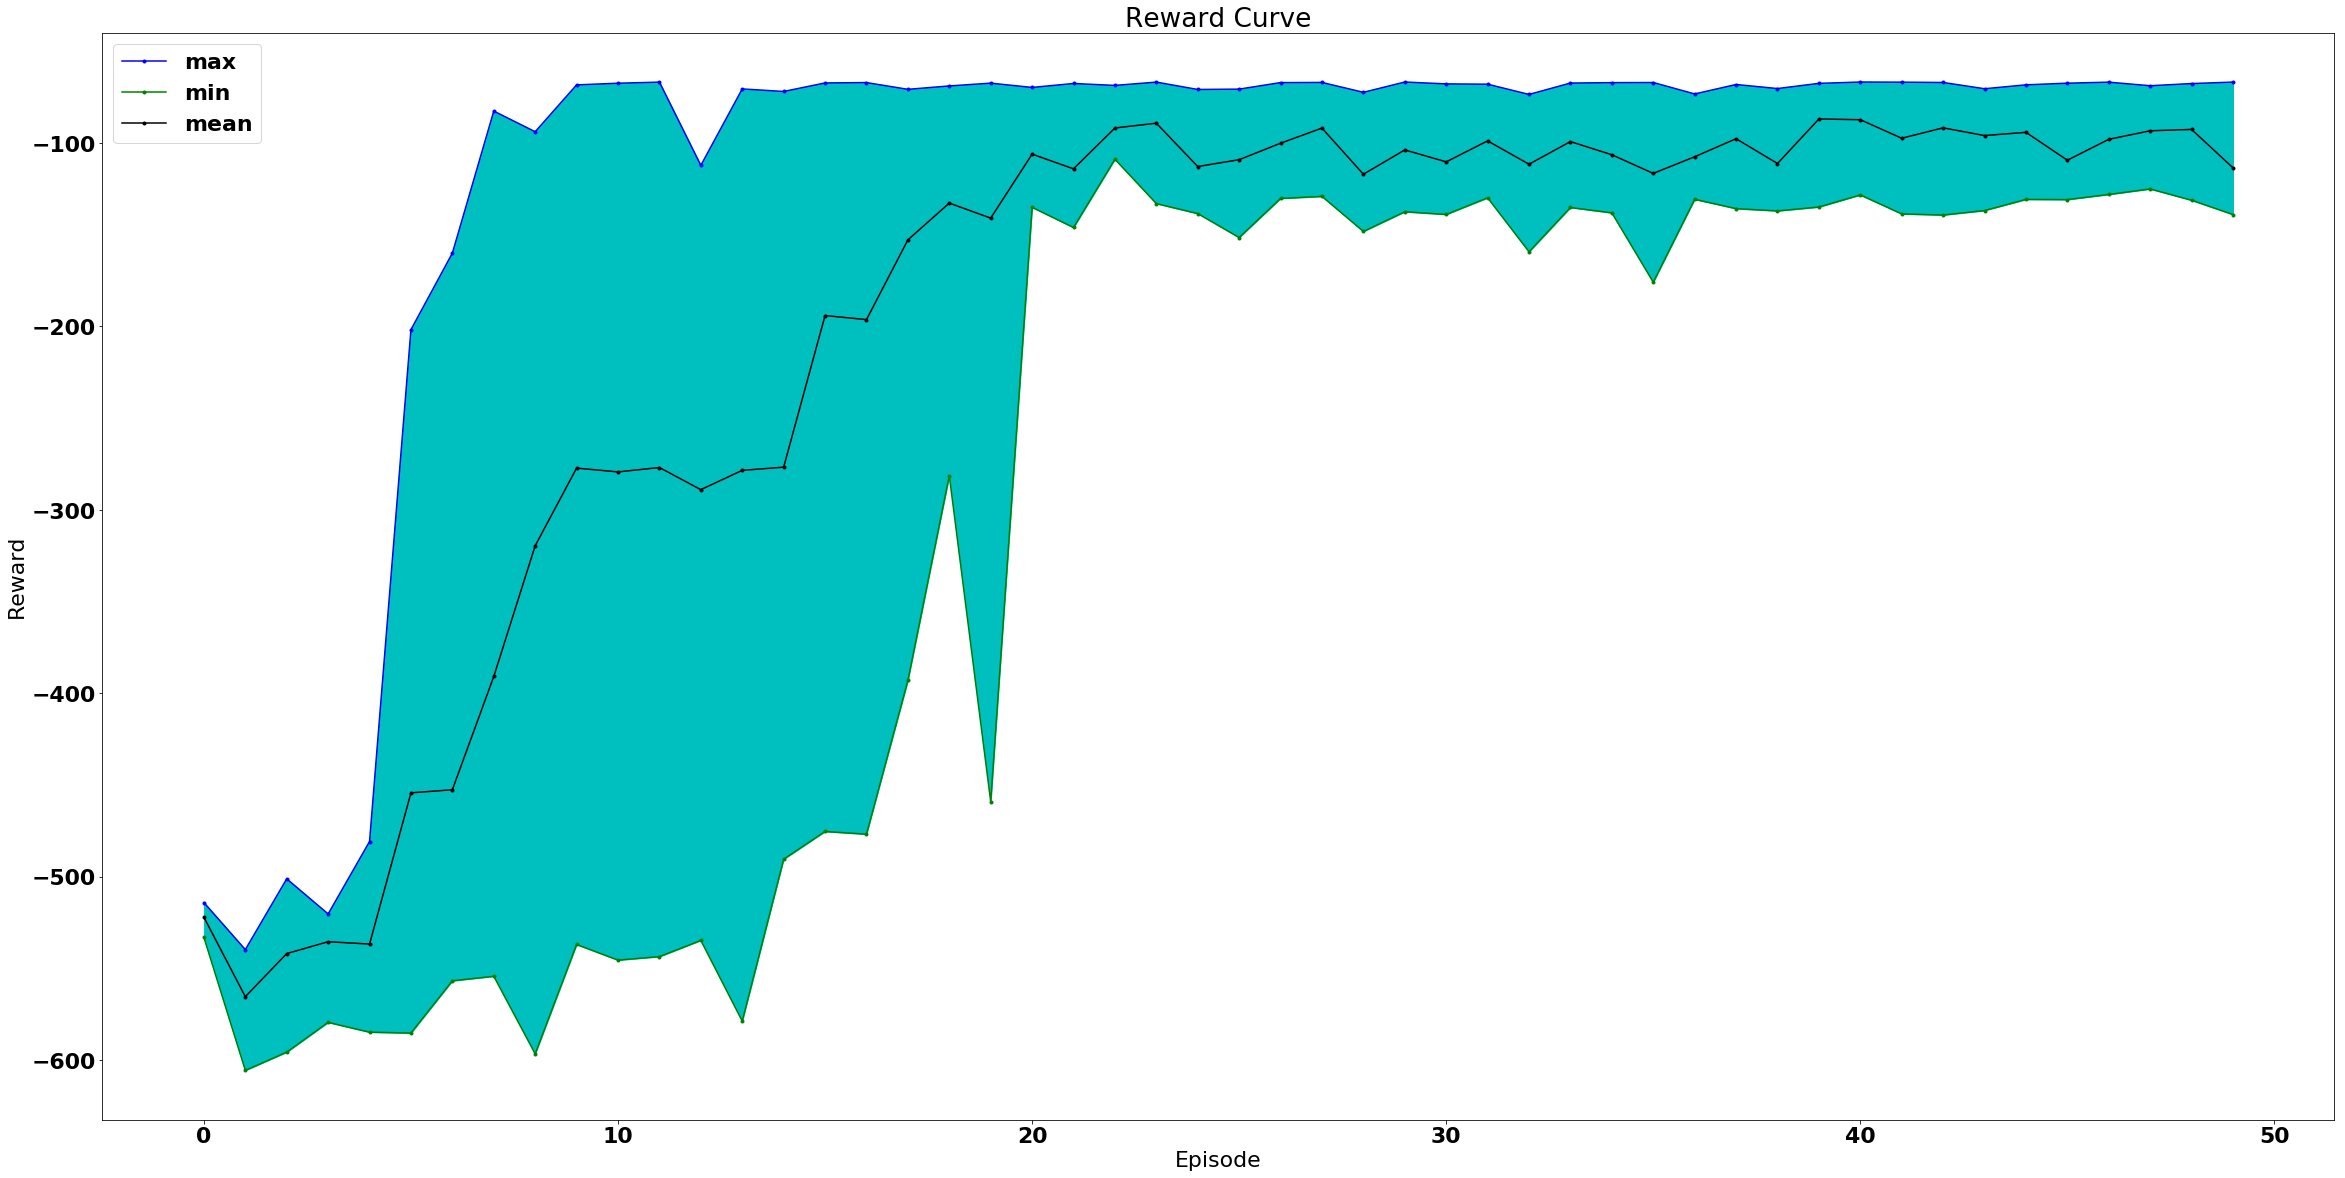

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.figure(figsize=(40,20))

nFinal_df = []
for id in range(7):
    path = './log/delay1/modify_reward/RP/noFinal_'+ str(id+1) +'.csv'
    data = pd.read_csv(path, names = ["reward", "steps"])
    nFinal_df.append(data)
    
total = list()

for episode in range(50):
    total.append([])
    for id in range(7):
        value = nFinal_df[id]['reward'][episode+1]
        total[episode].append(float(value))
        
data = dict()
data['max'] = list()
data['min'] = list()
data['mean'] = list()

for episode in range(50):
    maxData = max(total[episode])
    minData = min(total[episode])
    meanData = np.mean(total[episode])
    data['max'].append(maxData)
    data['min'].append(minData)
    data['mean'].append(meanData)

plt.plot(data['max'], color='b',label='max', marker='.')
plt.plot(data['min'], color='g',label='min', marker='.')
plt.plot(data['mean'], color='k',label='mean', marker='.')

plt.fill_between(range(50), data['max'], data['min'], color='c', label='')
# plt.yticks(np.arange(-700, 0, 10))

plt.title('Reward Curve')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()